In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.metrics import r2_score

In [2]:
#Downloading Data

start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.447413,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.458559,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.355827,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.344078,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.386255,447610800


In [3]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.447413,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.458559,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.355827,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.344078,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.386255,447610800


In [4]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


In [5]:
# Spliting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [7]:
# Scaling the data using MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [8]:
# Preparing data for training

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
# Model Training

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          26,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,411 (423.48 KB)

 Trainable params: 108,411 (423.48 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 162ms/step - loss: 0.1251
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0244
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0161
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0148
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0154
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0121
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0140
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0122
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0109
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0110
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0105
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0110
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0093
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0095
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0091
Ep

In [12]:
model.save('exp10_model.h5')

In [19]:
past_100_days = data_training.tail(100)

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [20]:
input_data.shape

(855, 1)

In [21]:
# Preparing data for testing

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [22]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [23]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [24]:
y_predicted.shape

(755, 1)

In [25]:
y_predicted

array([[0.161773  ],
       [0.16232392],
       [0.1628168 ],
       [0.16323227],
       [0.16356444],
       [0.16381344],
       [0.16399488],
       [0.16414192],
       [0.1642923 ],
       [0.16447356],
       [0.16470614],
       [0.16498998],
       [0.16531691],
       [0.16568467],
       [0.16608348],
       [0.16649926],
       [0.16691992],
       [0.16733369],
       [0.16773584],
       [0.16814315],
       [0.16856542],
       [0.16900483],
       [0.16945267],
       [0.16992956],
       [0.17052844],
       [0.17130601],
       [0.17230296],
       [0.17354658],
       [0.17504051],
       [0.17661023],
       [0.17827326],
       [0.18001863],
       [0.18184417],
       [0.18375424],
       [0.18574187],
       [0.18778905],
       [0.18987826],
       [0.19199577],
       [0.19412246],
       [0.19623393],
       [0.1983085 ],
       [0.20032814],
       [0.20229974],
       [0.20423841],
       [0.20615399],
       [0.20804805],
       [0.20991327],
       [0.211

In [26]:
scaler.scale_
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

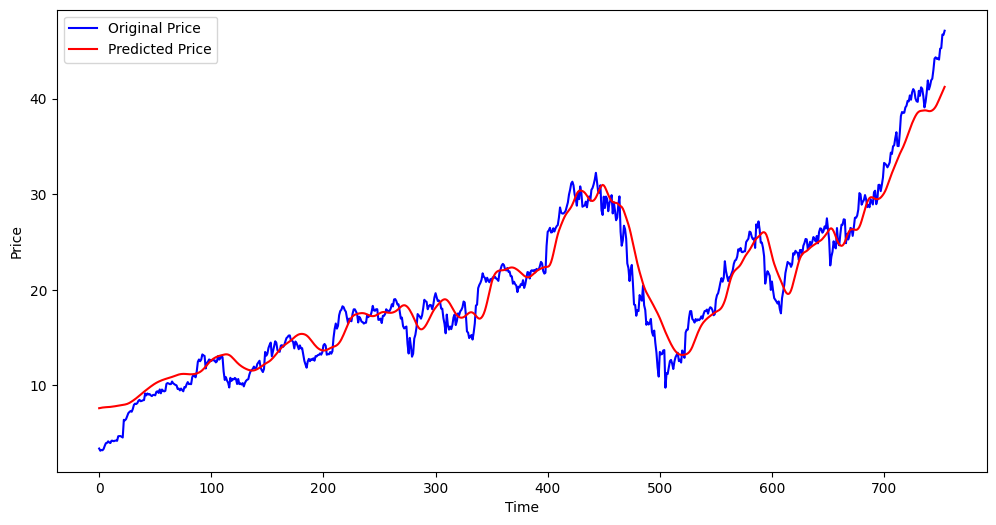

In [27]:
# Original vs Predicted Prices

plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
# Calculate the R² score

r2 = r2_score(y_test, y_predicted)
print(f"R² Score: {r2}")

R² Score: 0.9435708675393555


In [17]:
# Make predictions
y_pred = model.predict(x_test)

# Rescale the predictions
scale_factor = 1/0.02123255
y_pred_rescaled = y_pred * scale_factor
y_test_rescaled = y_test * scale_factor

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


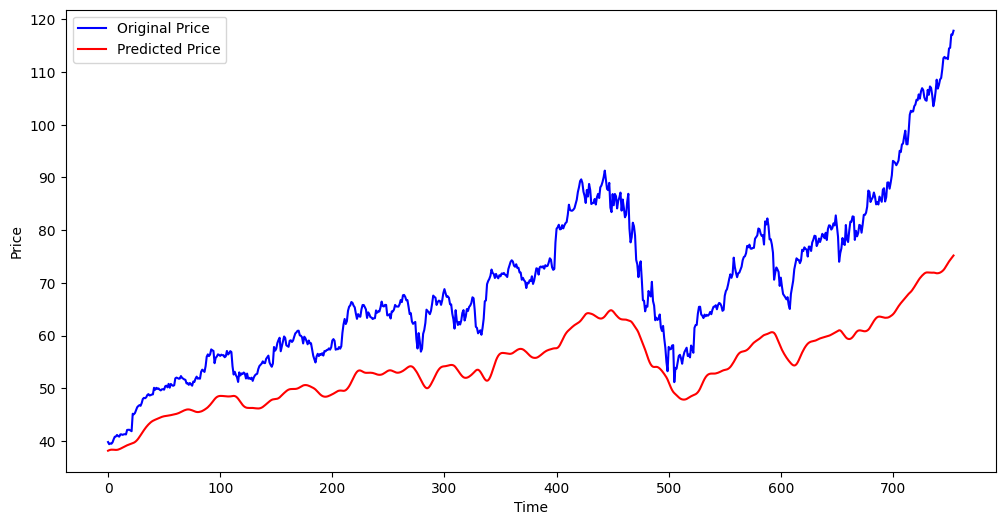

In [18]:
# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, 'b', label='Original Price')
plt.plot(y_pred_rescaled, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()